In [79]:
import pandas as pd
import numpy as np
import matplotlib as mp

**Part 1 - Profile & QA the Data:**

Cast any date columns as a datetime format

Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

***

The csv file was massive, then i would put low_memory as False just in case

In [3]:
listing = pd.read_csv('Airbnb Data/Listings.csv', encoding = 'ISO-8859-1', low_memory = False)

In [4]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

The host_since was saved as object, lets cast this column into datetime

In [6]:
listing['host_since']= pd.to_datetime(listing['host_since'])

In [9]:
listing.host_since.info()

<class 'pandas.core.series.Series'>
RangeIndex: 279712 entries, 0 to 279711
Series name: host_since
Non-Null Count   Dtype         
--------------   -----         
279547 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


For this project, I would focus on the Paris area and take only some columns:

In [12]:
paris_listing = listing.query("city == 'Paris'").loc[:,['host_since','neighbourhood','city','accommodates','price']]

In [13]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


There are missing values from host_since, but only 33 out of 64690. I decided to drop these row

In [27]:
paris_listing = paris_listing.dropna(subset=['host_since'])

In [28]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


Lets have an overview into the dataset

In [36]:
paris_listing.describe(include=[np.int64])

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


I noticed there are listing with price = 0 and accommodates = 0

In [38]:
paris_listing.query('accommodates == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [39]:
paris_listing.query('price == 0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

This could be an incomplete listing of incorrect data. Since the ratio was tiny, I will also drop these listing

In [40]:
paris_listing = paris_listing.query("accommodates != 0 and price != 0")

***

**Part 2 - Prepare the data for visualization:**

Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

***

In [56]:
paris_listing_neighbourhood = (
    paris_listing
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price')
    )

In [57]:
paris_listing_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.794589
Palais-Bourbon,157.514464
Passy,161.290875
Louvre,175.754448
Elysee,211.373651


In [73]:
paris_lising_accommodate =  (
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values('price')
)

In [60]:
paris_lising_accommodate.head()

,price,neighbourhood
accommodates,,
1,79.522222,90
3,153.882759,145
2,155.103352,716
4,212.096070,458
5,328.817073,82


In [62]:
paris_listing_over_time = (
    paris_listing
    .set_index('host_since')
    .resample('YE')
    .agg({'neighbourhood':'count',
            'price':'mean'
         })
)

In [65]:
paris_listing_over_time.tail()

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5685,129.962533
2020-12-31,3363,143.517098
2021-12-31,133,93.488722


***

**Part 3 - Visualize the data and summarize the findings**
    
Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

BONUS: Create a dual axis line chart to show both new hosts and average price over time

***

In [68]:
import seaborn as sb

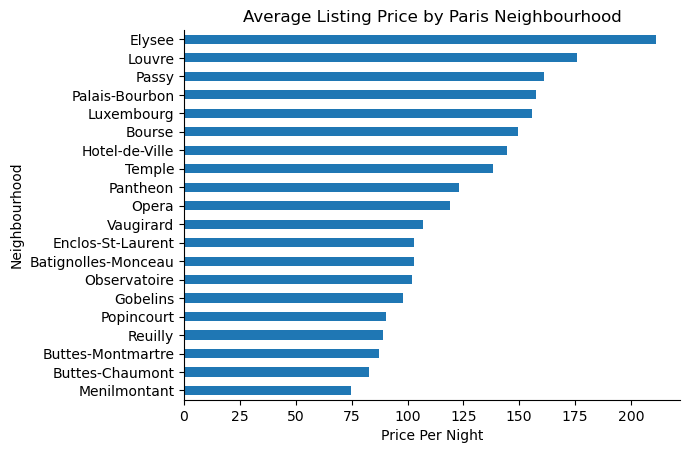

In [71]:
paris_listing_neighbourhood.plot.barh(
    title = 'Average Listing Price by Paris Neighbourhood',
    xlabel = 'Price Per Night',
    ylabel = 'Neighbourhood',
    legend = ''

)
sb.despine()

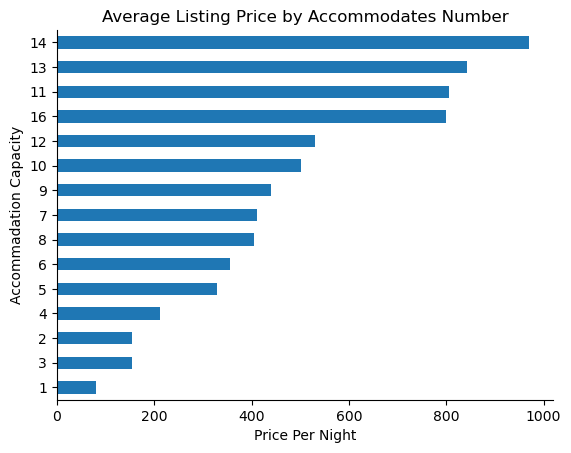

In [74]:
paris_lising_accommodate.plot.barh(
    title = 'Average Listing Price by Accommodates Number',
    xlabel = 'Price Per Night',
    ylabel = 'Accommadation Capacity',
    legend = ''

)
sb.despine()

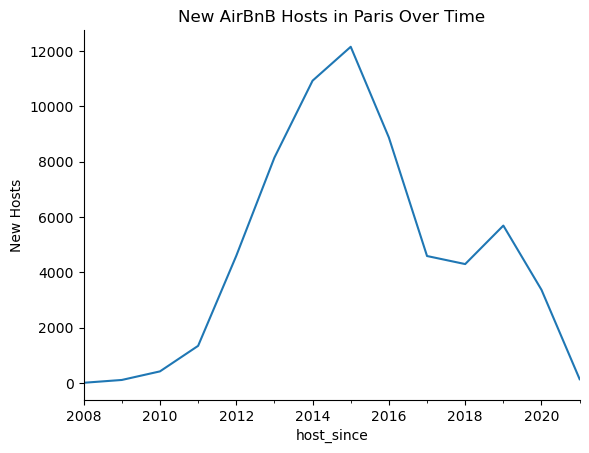

In [76]:
paris_listing_over_time['neighbourhood'].plot(
    title = 'New AirBnB Hosts in Paris Over Time',
    ylabel = 'New Hosts',
    legend = ''
)
sb.despine()

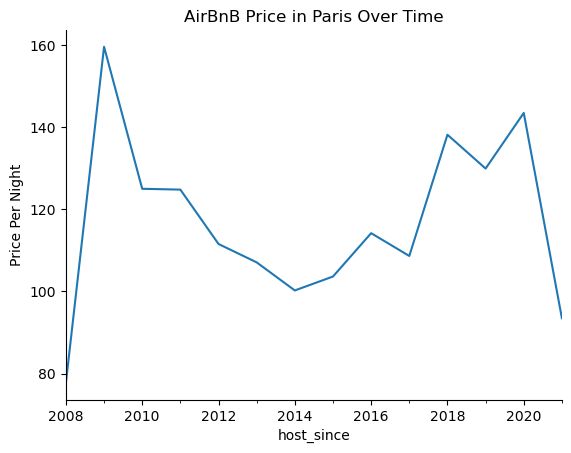

In [78]:
paris_listing_over_time['price'].plot(
    title = 'AirBnB Price in Paris Over Time',
    ylabel = 'Price Per Night',
    legend = ''
)
sb.despine()

Text(0, 0.5, 'Price Per Night')

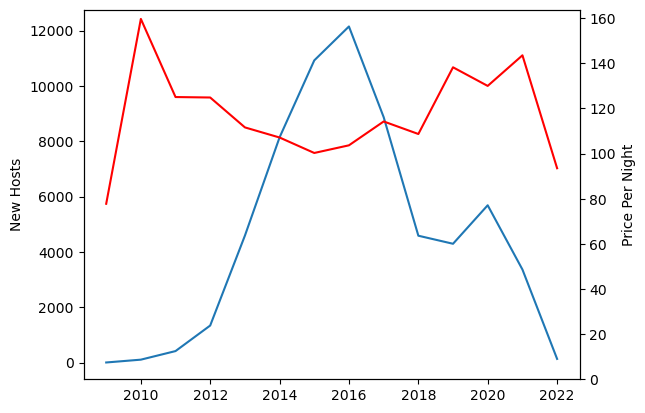

In [88]:
fix, ax = mp.pyplot.subplots()

ax.plot(

    paris_listing_over_time.index,
    paris_listing_over_time['neighbourhood'], label = 'New Hosts'
    
)
ax.set_ylabel('New Hosts')
ax2 = ax.twinx()

ax2.plot(

    paris_listing_over_time.index,
    paris_listing_over_time['price'], label = 'Price',
    c='red'
    
)
ax2.set_ylim(0)
ax2.set_ylabel('Price Per Night')


According to this dataset. The price per night is related to the amount of new hosts, the more hosts there were, the lower the price and vice versa. 
How ever this relationship is not lineage.